In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn.objects as so

In [3]:
fn = './data/Cars93.csv'
cars = pd.read_csv(fn)

fn1 = './data/car_features_MSRP.csv'
cars_new = pd.read_csv(fn1)

In [4]:
cars.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [5]:
cars_new.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
# pd.options.display.max_rows = 30
cars.Model.value_counts()

Integra          1
Capri            1
Cutlass_Ciera    1
Achieva          1
Maxima           1
                ..
Vision           1
Summit           1
Stealth          1
Dynasty          1
850              1
Name: Model, Length: 93, dtype: int64

In [7]:
# Drop the row that contains 'rotary' in the cylinders column
cars = cars.drop(cars[cars['Cylinders'] == 'rotary'].index)

# convert "Cylinders" column to numeric
cars['Cylinders'] = pd.to_numeric(cars['Cylinders'])

In [8]:
# prepare for experiment, only numeric X's
num_cols = cars.columns[cars.dtypes != 'object'].dropna()
cars_num=cars[num_cols].dropna()

# drop y
num_cols = num_cols.drop('Price')

cars_num.head()

,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,1,12.9,15.9,18.8,25,31,4,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.0,2705
1,2,29.2,33.9,38.7,18,25,6,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.0,3560
2,3,25.9,29.1,32.3,20,26,6,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.0,3375
3,4,30.8,37.7,44.6,19,26,6,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.0,3405
4,5,23.7,30.0,36.2,22,30,4,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.0,3640


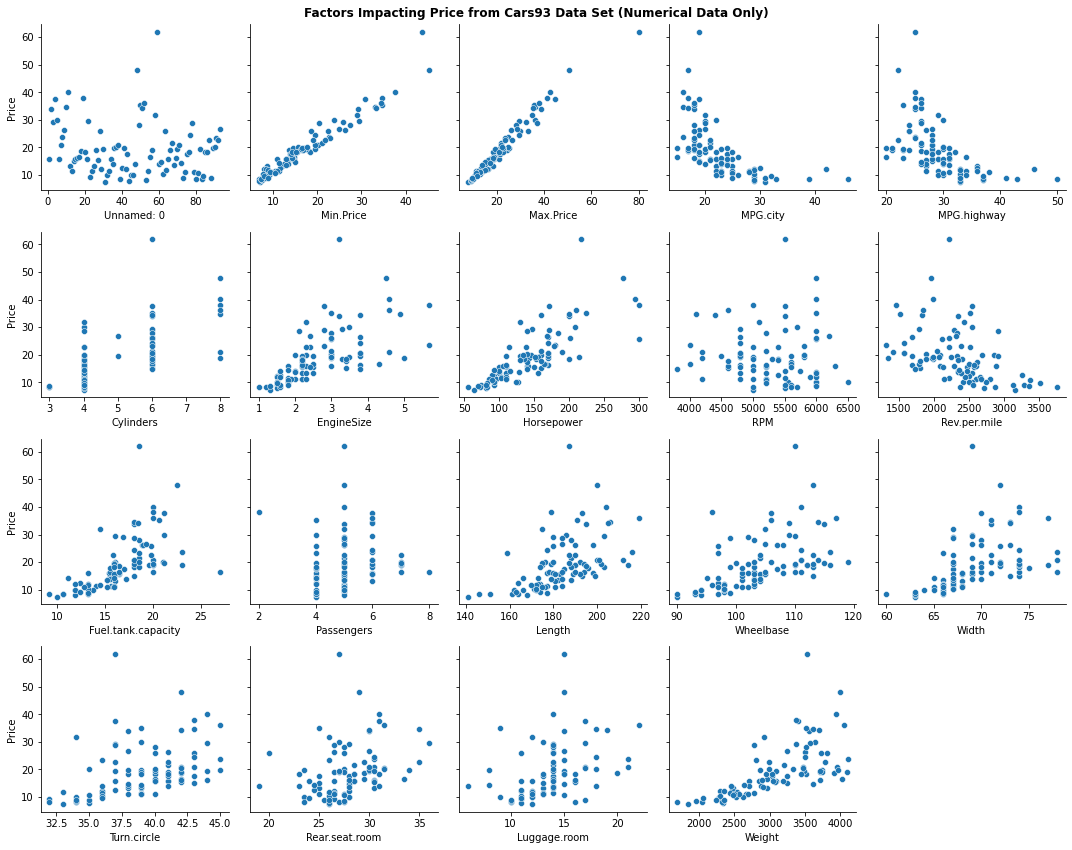

In [33]:
x_vars=num_cols
y_var="Price"

g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=5, sharex=False)
for ax, x_var in zip(g.axes, x_vars):
    sns.scatterplot(data=cars, x=x_var, y=y_var, ax=ax)
    g.set_titles(row_template='', col_template='')


g.fig.suptitle("Factors Impacting Price from Cars93 Data Set (Numerical Data Only)", fontsize='large', fontweight='bold')

g.tight_layout()
g.fig.savefig('img/scatter_plot.png')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cars_num.drop('Price', axis=1), cars_num['Price'], test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((65, 19), (17, 19), (65,), (17,))

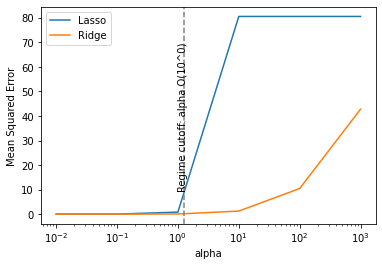

In [36]:
alphas = [0.01, 0.1, 1, 10, 100, 1000] # range of alpha values to try
lasso_scores = []
ridge_scores = []

for alpha in alphas:
    # fit Lasso model
    lasso = Lasso(alpha=alpha,)
    lasso.fit(X_train, y_train)
    # lasso_regressor.fit(X_train, y_train)
    lasso_scores.append(mean_squared_error(y_test, lasso.predict(X_test)))

    # fit Ridge model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    # ridge_regressor.fit(X_train, y_train)
    ridge_scores.append(mean_squared_error(y_test, ridge.predict(X_test)))

# plot the results
fig, ax = plt.subplots()
plt.plot(alphas, lasso_scores, label='Lasso')
plt.plot(alphas, ridge_scores, label='Ridge')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.axvline(x=1.25, linestyle='--', color='gray')

# add line and label
plt.text(alphas[2],10, 'Regime cutoff: alpha O(10^0)',ha='left',rotation=90)
plt.show()
fig.savefig('img/lasso_ridge_regimes.png')

 Ridge best alpha: {'alpha': 0.001}
 Ridge best score: -0.0010378010955886137
 Lasso best alpha: {'alpha': 0.001}
 Lasso best score: -0.0009668405665075328
 Linear best score: -0.0010422280127113358, or score: 0.9999748590252451


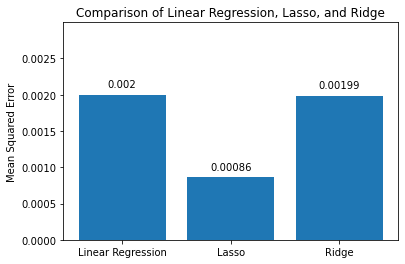

In [38]:
parameters= {'alpha': [1e-9, 1e-6, 1e-3, 1, 10, 100, 1000]} 

linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
mse = cross_val_score(linear_regressor,X_train,y_train,scoring = 'neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5) 
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5) 

lasso_regressor.fit(X_train,y_train);
ridge_regressor.fit(X_train,y_train);

print(f' Ridge best alpha: {ridge_regressor.best_params_}\n Ridge best score: {ridge_regressor.best_score_}')
print(f' Lasso best alpha: {lasso_regressor.best_params_}\n Lasso best score: {lasso_regressor.best_score_}')
print(f' Linear best score: {mean_mse}, or score: {linear_regressor.score(X_test,y_test)}')


# fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = mean_squared_error(y_test, lr.predict(X_test))

# fit Lasso model
lasso = Lasso(alpha=.01)
lasso.fit(X_train, y_train)
lasso_score = mean_squared_error(y_test, lasso.predict(X_test))

# fit Ridge model
ridge = Ridge(alpha=.01)
ridge.fit(X_train, y_train)
ridge_score = mean_squared_error(y_test, ridge.predict(X_test))

# plot the results
models = ['Linear Regression', 'Lasso', 'Ridge']
scores = [lr_score, lasso_score, ridge_score]

fig,ax = plt.subplots()

plt.bar(models, scores)
plt.ylim([0, np.max(scores)+.001])
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Linear Regression, Lasso, and Ridge')

# add data labels on top of bars
for i, v in enumerate(scores):
    plt.text(i, v +0.0001, str(round(v, 5)), ha='center')

plt.show()
fig.savefig('img/cars93mse.png')


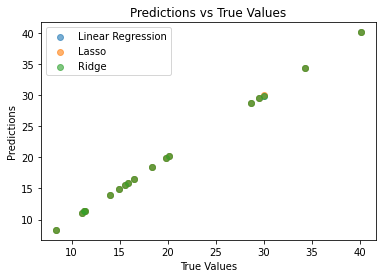

In [14]:
# Plot the predicted values against the true values
plt.scatter(y_test, linear_regressor.predict(X_test), alpha=0.6, label="Linear Regression")
plt.scatter(y_test, lasso_regressor.predict(X_test), alpha=0.6, label="Lasso")
plt.scatter(y_test, ridge_regressor.predict(X_test), alpha=0.6, label="Ridge")
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predictions vs True Values")
plt.show()

In [15]:
best_alpha = alphas[ridge_scores.index(min(ridge_scores))]
ridge = Ridge(alpha=best_alpha)
ridge.fit(cars_num.drop('Price', axis=1), cars_num['Price'])

Ridge(alpha=0.01)

In [16]:
# prepare for experiment, only numeric X's
num_cols1 = cars_new.columns[cars_new.dtypes != 'object'].dropna()
cars_new_num=cars_new[num_cols1].dropna()

# drop y
num_cols1 = num_cols1.drop('MSRP')

cars_new_num.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


c:\Users\13073\anaconda3\lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


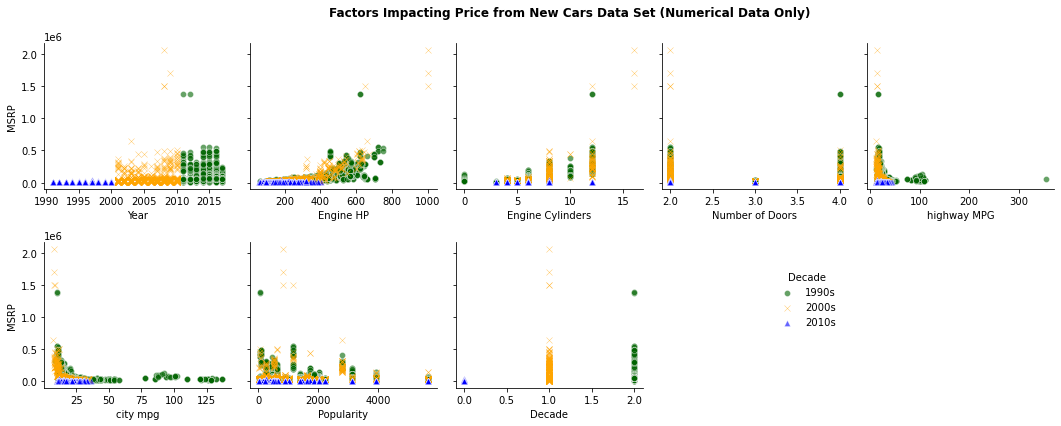

In [37]:
# create a list of decade labels for the legend
decade_labels = ['{}s'.format(i) for i in range(1990,2020,10)]

# create a list of decade ranges for each label
decade_ranges = [(1990+i*10, 1999+i*10) for i in range(0,3)]

# bin the 'Year' column by decade
cars_new['Decade'] = pd.cut(cars_new['Year'], bins=range(1990, 2021, 10), labels=range(3))

# prepare for experiment, only numeric X's
cols = cars_new.columns[cars_new.dtypes != 'object'].dropna()

# drop y
cols = cols.drop('MSRP')
x_vars=cols
y_var="MSRP"

g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=5, sharex=False)

# set the color and marker style of the points based on decade
for i, x_var in enumerate(x_vars):
    decade_colors = ['darkgreen', 'orange', 'blue']
    decade_markers = ['o', 'x', '^']
    for decade, color, marker in zip(range(2, -1, -1), decade_colors, decade_markers):
        subset = cars_new[cars_new['Decade'] == decade]
        sns.scatterplot(data=subset, x=x_var, y=y_var, ax=g.axes[i], color=color, marker=marker, alpha=0.6)
        g.set_titles(row_template='', col_template='')

# add a single legend for all subplots
legend = g.add_legend(title='Decade', labels=decade_labels, bbox_to_anchor=(0.74, 0.3))

# set plot title font size and weight
g.fig.suptitle("Factors Impacting Price from New Cars Data Set (Numerical Data Only)", fontsize='large', fontweight='bold')

g.tight_layout()
g.fig.savefig('img/scatter_decades.png')

In [18]:
cars_num.columns

Index(['Unnamed: 0', 'Min.Price', 'Price', 'Max.Price', 'MPG.city',
       'MPG.highway', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM',
       'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight'],
      dtype='object')

In [19]:
# cars93 columns to compare 
features = ['Cylinders', 'Horsepower', 'MPG.city', 'MPG.highway']

#new cars columns to compare
features1 = ['Engine Cylinders','Engine HP','city mpg','highway MPG']

# Select the features to train on from cars93 data
X_train1 = cars_num[features]
y_train1 = cars_num['Price']

#select test set from new cars dataset
X_test1 = cars_new_num[features1]
y_test1 = cars_new_num['MSRP']

In [21]:
# Scale the input features
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

c:\Users\13073\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [22]:
X_train1.shape, X_test1.shape, y_train1.shape,y_test1.shape

((82, 4), (11815, 4), (82,), (11815,))

Ridge best alpha: {'alpha': 10}
Ridge best score: -41.9
Lasso best alpha: {'alpha': 0.001}
Lasso best score: -43
Linear best score: -43, or score: -0.405


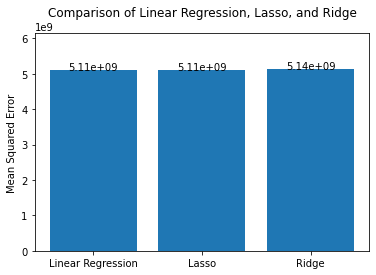

In [39]:
linear_regressor1 = LinearRegression()
linear_regressor1.fit(X_train1,y_train1)
mse1 = cross_val_score(linear_regressor1,X_train1,y_train1,scoring = 'neg_mean_squared_error', cv=5)
mean_mse1 = np.mean(mse1)

lasso_regressor1 = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5) 
ridge_regressor1 = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5) 

lasso_regressor1.fit(X_train1,y_train1);
ridge_regressor1.fit(X_train1,y_train1);

print(f'Ridge best alpha: {ridge_regressor1.best_params_}\nRidge best score: {ridge_regressor1.best_score_:.3g}')
print(f'Lasso best alpha: {lasso_regressor1.best_params_}\nLasso best score: {lasso_regressor1.best_score_:.3g}')
print(f'Linear best score: {mean_mse1:.3g}, or score: {linear_regressor1.score(X_test1, y_test1):.3g}')

# fit linear regression model
lr = LinearRegression()
lr.fit(X_train1, y_train1)
lr_score = mean_squared_error(y_test1, lr.predict(X_test1))

# fit Lasso model
lasso1 = Lasso(alpha=lasso_regressor1.best_params_['alpha'])
lasso1.fit(X_train1, y_train1)
lasso_score = mean_squared_error(y_test1, lasso1.predict(X_test1))

# fit Ridge model
ridge1 = Ridge(alpha=ridge_regressor1.best_params_['alpha'])
ridge1.fit(X_train1, y_train1)
ridge_score = mean_squared_error(y_test1, ridge1.predict(X_test1))

# plot the results
models = ['Linear Regression', 'Lasso', 'Ridge']
scores = [lr_score, lasso_score, ridge_score]

fig,ax=plt.subplots()

plt.bar(models, scores)
plt.ylim([0, np.max(scores)+1e9])
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Linear Regression, Lasso, and Ridge')

# add data labels on top of bars
for i, v in enumerate(scores):
    plt.text(i, v+1+8, '{:.3g}'.format(v), ha='center')
plt.show()
fig.savefig('img/newcarsmse.png')

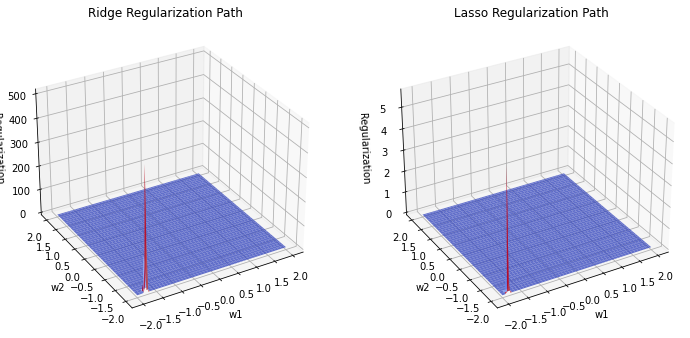

In [32]:
# define the range of w1 and w2 values to plot
wi = np.linspace(-2, 2, 100)
wj = np.linspace(-2, 2, 100)
W1, W2 = np.meshgrid(wi, wj)

# define the range of alpha values for regularization
alphas = np.logspace(-4, 2, 7)

# calculate the regularization paths for Ridge and Lasso
n_alphas = len(alphas)
n_features = X_train1.shape[1]

Z_ridge = np.zeros((100, 100))
Z_lasso = np.zeros((100, 100))

ridge_alpha = 1
lasso_alpha = 0.01

for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train1, y_train1)
    W = ridge.coef_
    for j in range(n_features):
        Z_ridge[j, i] = alpha * W[j]**2
    if alpha == ridge_alpha:
        ax1.scatter(W[0], W[1], ridge_alpha*sum(W**2), color='black', s=50, marker='o')
        
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train1, y_train1)
    W = lasso.coef_
    for j in range(n_features):
        Z_lasso[j, i] = alpha * abs(W[j])
    if alpha == lasso_alpha:
        ax2.scatter(W[0], W[1], lasso_alpha*sum(abs(W)), color='black', s=50, marker='o')

# plot the results
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# plot the Ridge regularization path
ax1.set_title('Ridge Regularization Path')
ax1.set_xlabel('w1')
ax1.set_ylabel('w2')
ax1.set_zlabel('Regularization')
ax1.plot_surface(W1, W2, Z_ridge, cmap=cm.coolwarm, alpha=0.8)

# plot the Lasso regularization path
ax2.set_title('Lasso Regularization Path')
ax2.set_xlabel('w1')
ax2.set_ylabel('w2')
ax2.set_zlabel('Regularization')
ax2.plot_surface(W1, W2, Z_lasso, cmap=cm.coolwarm, alpha=0.8)

# set the viewing angle for the plots
ax1.view_init(elev=30, azim=-120)
ax2.view_init(elev=30, azim=-120)

plt.show()
fig.savefig("img/regularization_paths.png")

